<a href="https://colab.research.google.com/github/PrazaKembaren/Deklinasi-Matahari/blob/main/Sun_Analemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisasi Analemma Matahari

**Analemma** adalah sebuah **diagram** yang menunjukkan **posisi Matahari** di langit pada **waktu yang sama setiap hari selama satu tahun**, jika dilihat **dari lokasi yang sama** di Bumi. Diagram ini biasanya **berbentuk angka delapan asimetris**. Bentuk ini **disebabkan dua faktor** yakni: **kemiringan sumbu Bumi** dan **orbit Bumi yang elips**.

In [1]:
from astropy.coordinates import  EarthLocation, AltAz, get_sun, get_moon
from astropy.time import Time
from datetime import datetime
from matplotlib import rcParams
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
import astropy.units as u
import datetime as datetime
import numpy as np

In [2]:
#using coordinate
city = "Tokyo"

latdeg = int(input("latitude  (deg) :"))
latmin = int(input("latitude  (min) :"))
latsec = float(input("latitude  (sec) :"))

londeg = int(input("longitude (deg) :"))
lonmin = int(input("longitude (min) :"))
lonsec = float(input("longitude (sec) :"))

obs = EarthLocation(lat= latdeg*u.deg + latmin*u.arcmin +  latsec*u.arcsec,
                    lon= londeg*u.deg + lonmin*u.arcmin +  lonsec*u.arcsec )

latitude  (deg) :35
latitude  (min) :39
latitude  (sec) :10.1952
longitude (deg) :139
longitude (min) :50
longitude (sec) :22.1208


In [3]:
#utc_shift (to japan standard time UTC+9)
utc_shift = 9*u.h

#define the time
western_ina_time = Time("2025-1-1 12:00:00") - utc_shift

#get the data for a whole year
elapsed = np.arange(0, 365, 1)*u.day
time = western_ina_time + elapsed
frame_local_24h = AltAz(obstime = time, location=obs)


isinstance(elapsed, np.ndarray)
isinstance(time, np.ndarray)

#get solar
sun = get_sun(time)
sun_local = sun.transform_to(frame_local_24h)

## Plotting

In [4]:
rcParams['axes.titlesize'] = 20
rcParams['axes.titlepad'] = 10
rcParams['axes.labelsize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

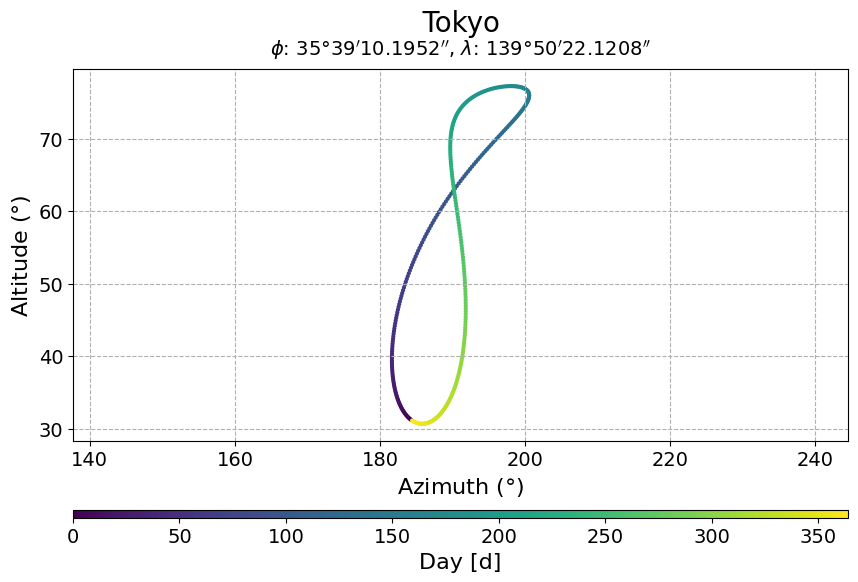

In [5]:
fig,ax = plt.subplots(figsize=(10,6))

plt.scatter(sun_local.az.deg, sun_local.alt.deg, c= elapsed, s=4)

plt.axis('equal')
plt.suptitle(f"{city}")
plt.title(f"$\phi$: {latdeg}$\degree${latmin}$'${latsec}$''$, $\lambda$: {londeg}$\degree${lonmin}$'${lonsec}$''$", fontsize=14)
plt.xlabel("Azimuth ($\degree$)")
plt.ylabel("Altitude ($\degree$)")
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.15, aspect=100).set_label('Day [d]')
plt.grid(linestyle='--')

plt.savefig(f"Analemma-{city}.png", dpi=600)


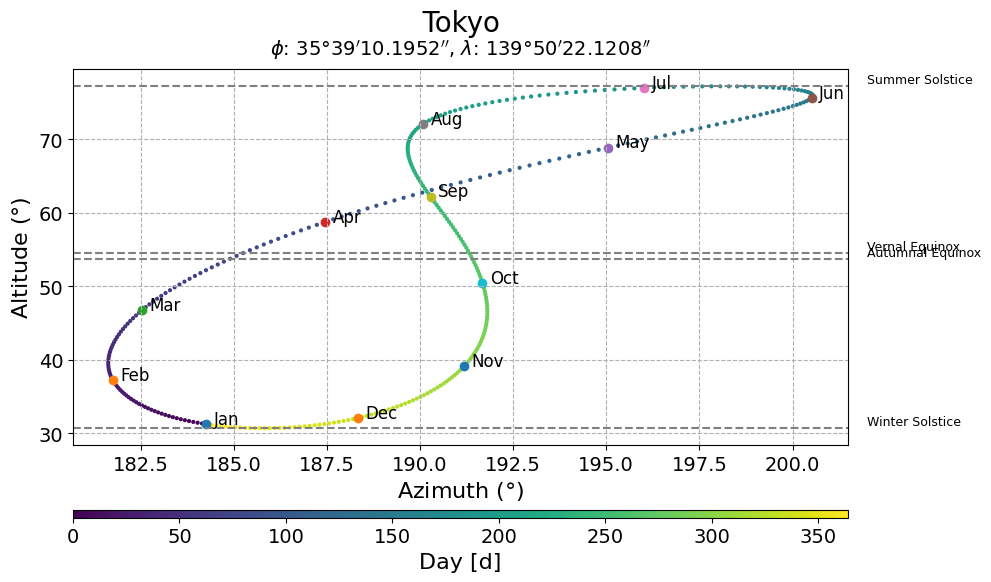

In [7]:
plt.figure(figsize=(10, 6))
#plt.xlim(75, 190)

plt.scatter(sun_local.az.deg, sun_local.alt.deg, c= elapsed, s=4)
plt.colorbar(orientation='horizontal', fraction=0.046, pad=0.14, aspect=100).set_label('Day [d]')
#plt.axis('equal')
plt.grid(linestyle='--')

# Add text labels for the first of each month, solstices, and equinoxes
month_starts = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, start in enumerate(month_starts):
    plt.scatter(sun_local.az.deg[start], sun_local.alt.deg[start])
    plt.text(sun_local.az.deg[start]+0.2, sun_local.alt.deg[start], month_names[i], fontsize=12)

solstice_equinox_days = [79, 172, 265, 356]  # Approximate days of solstices and equinoxes
solstice_equinox_labels = ['Vernal Equinox', 'Summer Solstice', 'Autumnal Equinox', 'Winter Solstice']
for i, day in enumerate(solstice_equinox_days):
    plt.text(202, sun_local.alt.deg[day], solstice_equinox_labels[i], fontsize=9, ha='left', va='bottom')
    plt.axhline(y=sun_local.alt.deg[day], linestyle='--', color='gray')

plt.suptitle(f"{city}")
plt.title(f"$\phi$: {latdeg}$\degree${latmin}$'${latsec}$''$, $\lambda$: {londeg}$\degree${lonmin}$'${lonsec}$''$", fontsize=14)
plt.xlabel("Azimuth ($\degree$)")
plt.ylabel("Altitude ($\degree$)")

plt.savefig(f"Analemma-{city}-anotasi.png", dpi=600)

## Altitude and Azimuth

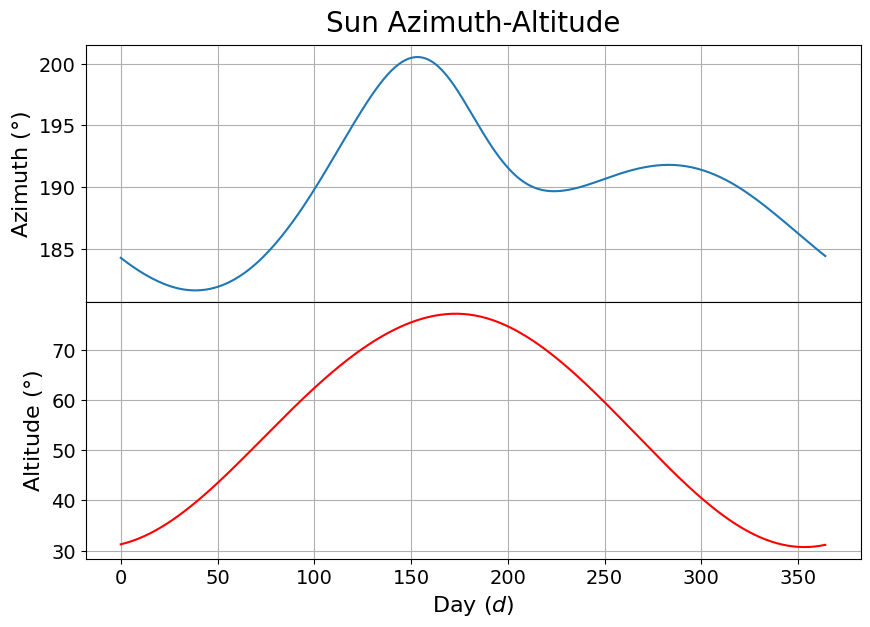

In [22]:
fig = plt.figure(figsize=(10,10))
fig.subplots_adjust(hspace=0)

ax = plt.subplot(311)

ax.plot(elapsed,sun_local.az.deg,   label="Azimuth")
ax.set_title("Sun Azimuth-Altitude")
ax.set_xlabel("Day ($d$)")
ax.set_ylabel("Azimuth ($\degree$)")
ax.grid()


ax = plt.subplot(312)

ax.plot(elapsed,sun_local.alt.deg, color='red',  label="Altitude")
ax.set_xlabel("Day ($d$)")
ax.set_ylabel("Altitude ($\degree$)")
ax.grid()

plt.show()

## GIF Animation

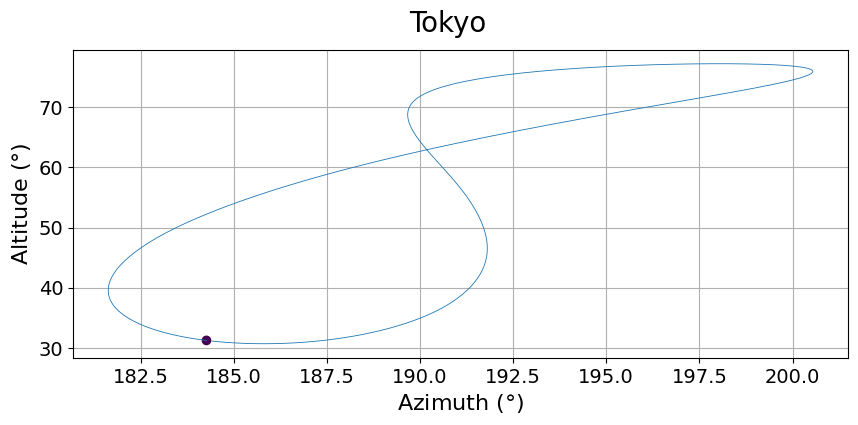

In [17]:
fig, ax = plt.subplots(figsize=(10, 4))

sc = ax.scatter(sun_local.az.deg, sun_local.alt.deg, c=elapsed, label="Position")

plt.suptitle(f"{city}", fontsize=20)
plt.plot(sun_local.az.deg, sun_local.alt.deg, lw=0.6)
plt.xlabel("Azimuth ($\degree$)")
plt.ylabel("Altitude ($\degree$)")
plt.grid()

def animate(i):
    sc.set_offsets(np.c_[sun_local.az.deg[i], sun_local.alt.deg[i]])
anim = FuncAnimation(fig, animate, frames=len(elapsed), interval=10)

# membuat GIF
anim.save('analemma_position7.gif', dpi=150, writer='pillow')


# Contoh Kota Lain

## Mekah

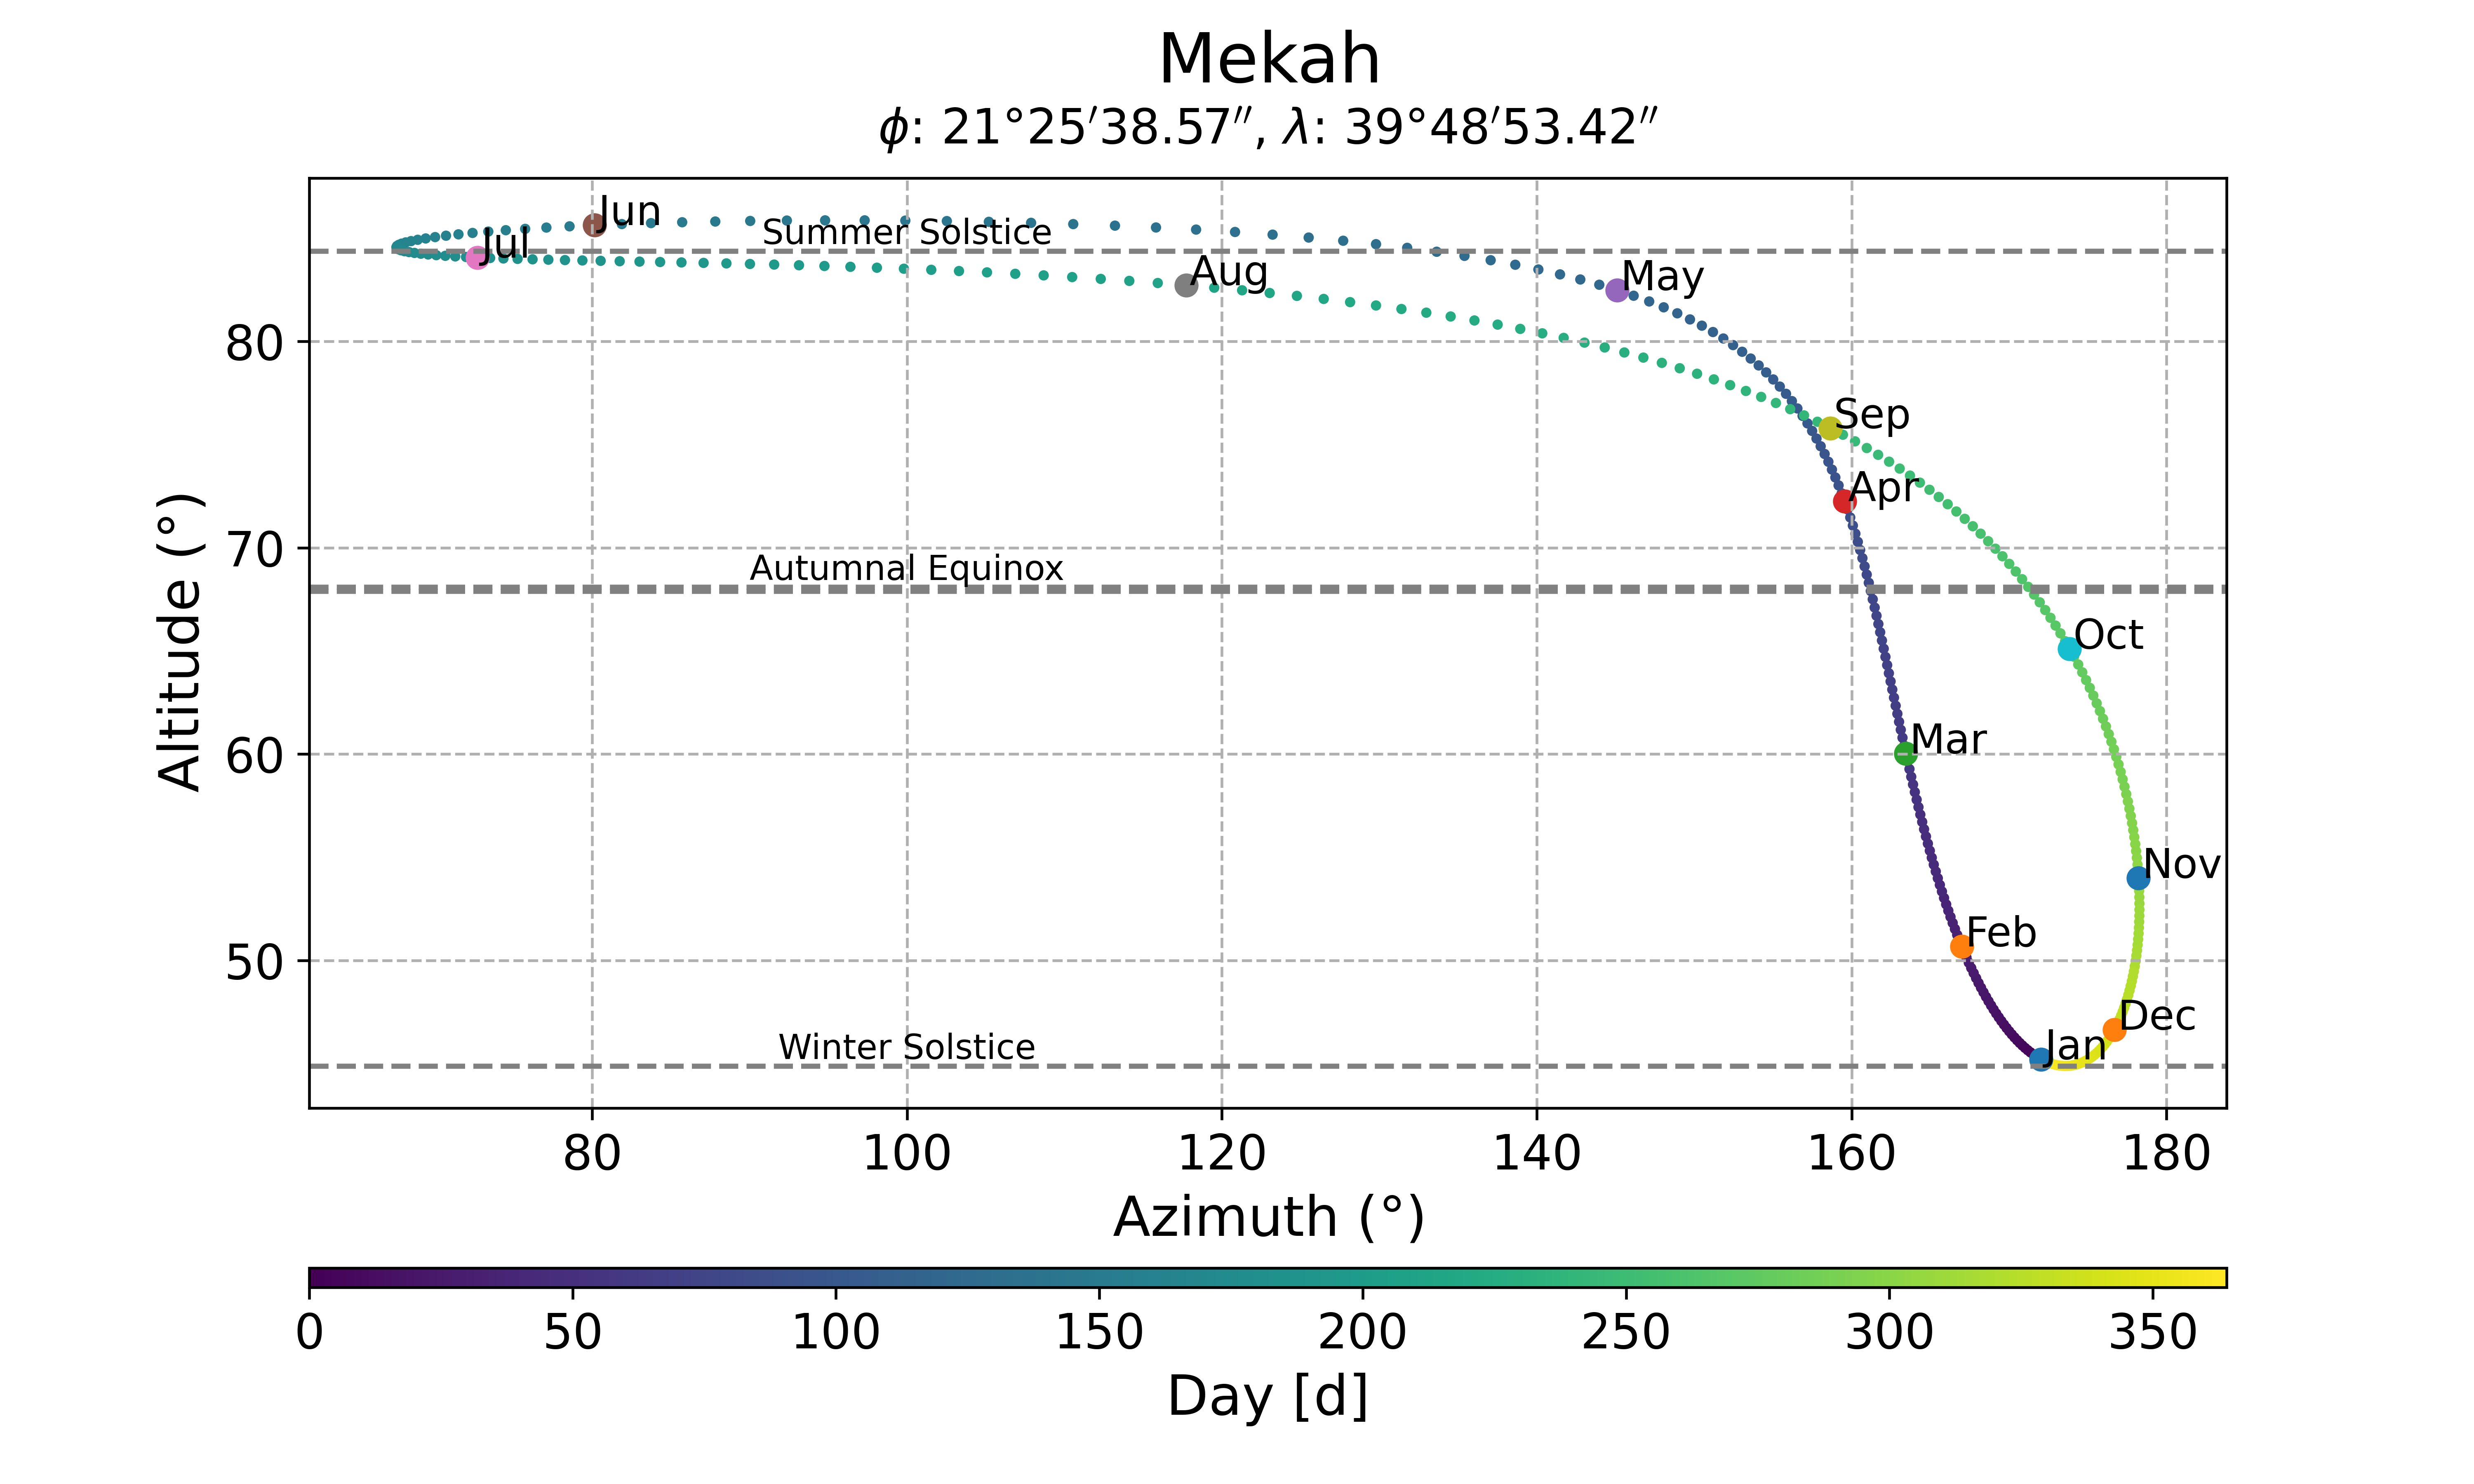

## Greenwich

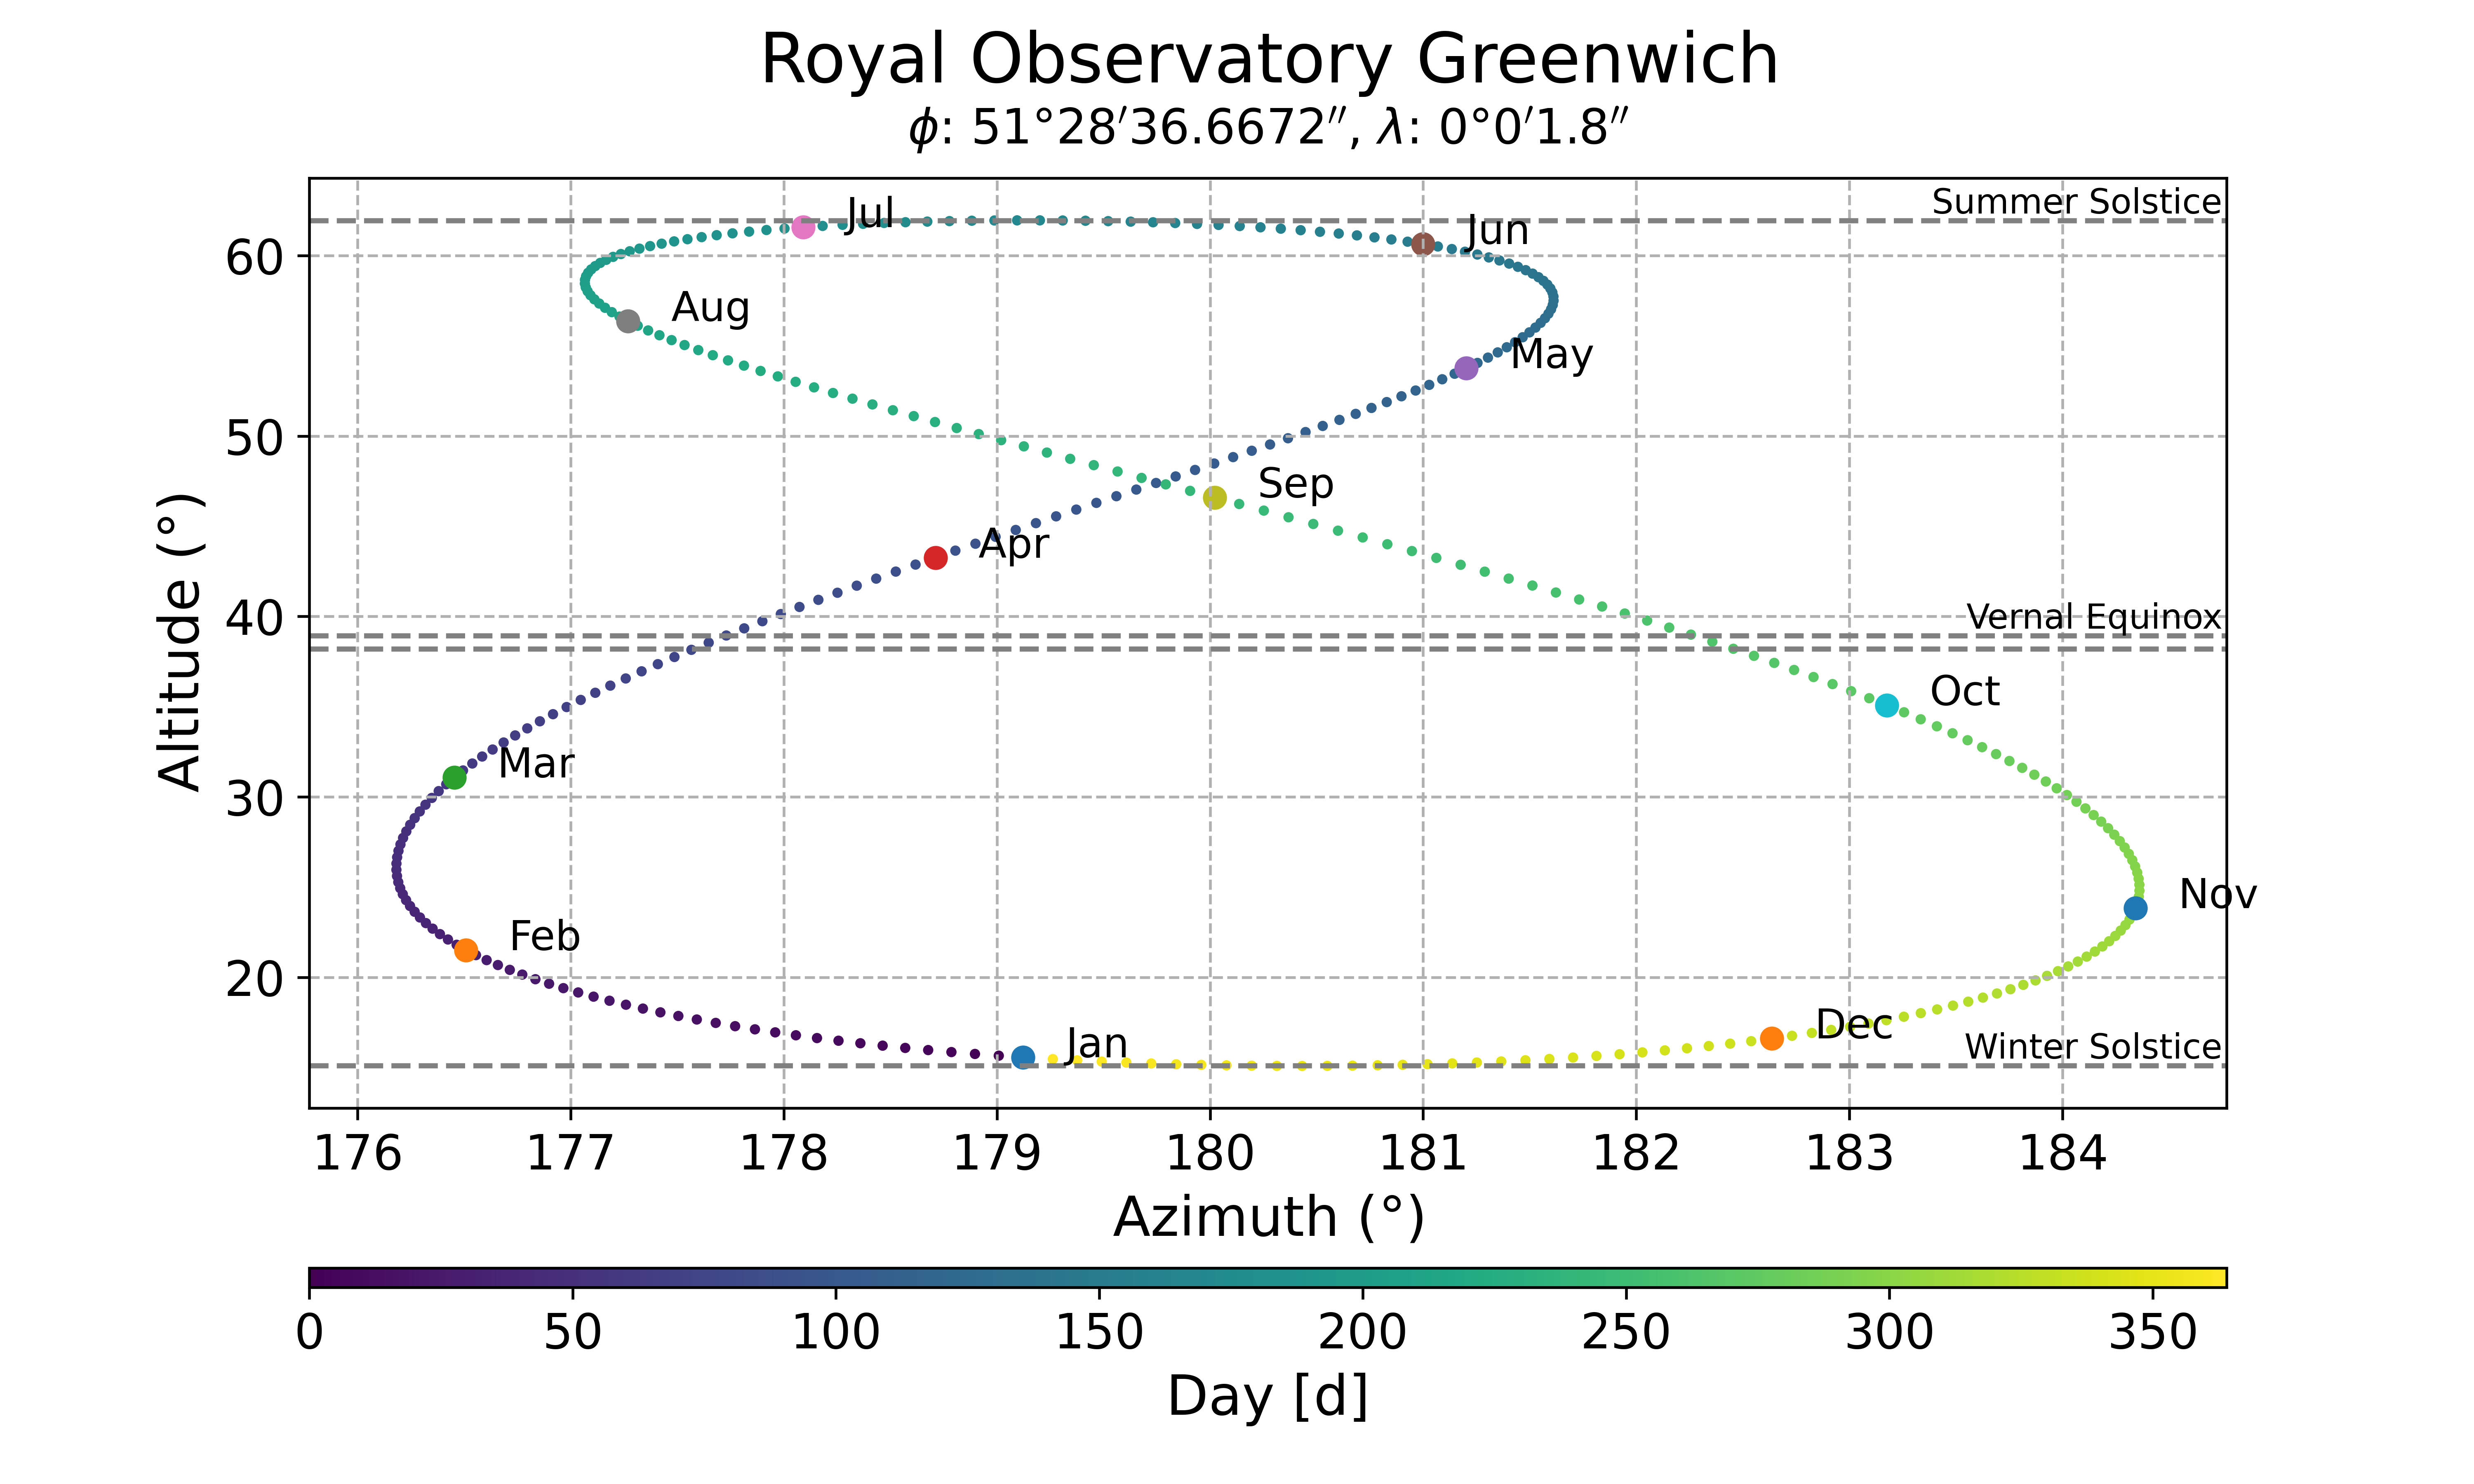